In [1]:
pip install pandas numpy seaborn wordcloud scikit-learn matplotlib nltk

Note: you may need to restart the kernel to use updated packages.


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None


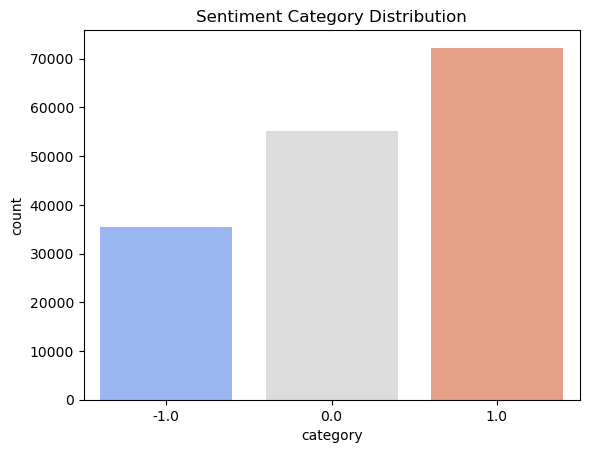

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv(r"C:\Users\Aditi\Downloads\archive (2)\Twitter_Data.csv")  # Replace with actual filename

# Display basic info
print(df.head())
print(df.info())

# Check sentiment distribution
sns.countplot(x=df["category"], palette="coolwarm")
plt.title("Sentiment Category Distribution")
plt.show()


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Fill missing text values
df["clean_text"] = df["clean_text"].fillna("")

# Drop NaN values in the target column
df = df.dropna(subset=["category"])
df["category"] = df["category"].astype(int)  # Ensure 'category' is numeric

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["category"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)  # ✅ No more NaN errors

# Predictions
y_pred = model.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.74


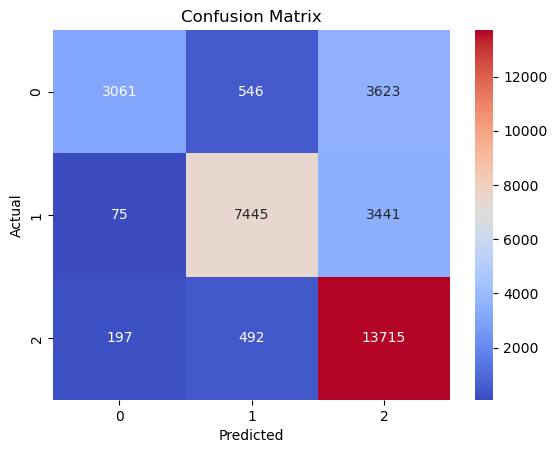

In [8]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


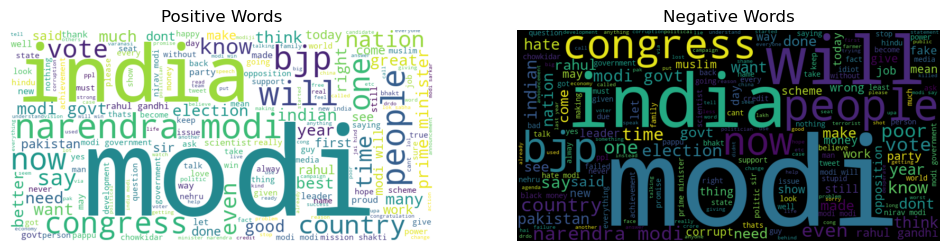

In [9]:
positive_text = " ".join(df[df["category"] == 1]["clean_text"])
negative_text = " ".join(df[df["category"] == -1]["clean_text"])

wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color="black").generate(negative_text)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Words")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Words")
plt.axis("off")

plt.show()


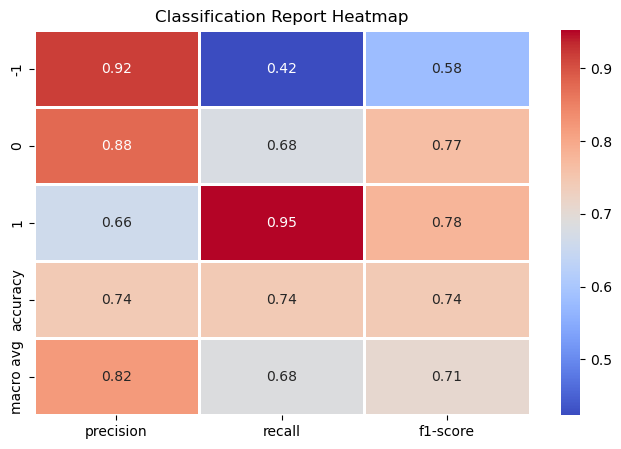

In [12]:
import matplotlib.pyplot as plt
# Plot Classification Report as Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", linewidths=1)
plt.title("Classification Report Heatmap")
plt.show()